# Summary of some variables

Firstly, give basic pictures of the variables we concern, including their simple relationship. 

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


def bar_annotation(ax, option='number'):
    '''
    This function is to add according number or percentage on every bar
    option: number or percentage, default is number
    ax: the figure object
    '''
    try:
        if option == 'number':
            for i in ax.patches:
                ax1.text(i.get_x(), i.get_height()+.5, i.get_height(),
                         fontsize=15, color='dimgrey')
        if option == 'percentage':
            totals = []
            for i in ax.patches:
                totals.append(i.get_height())
                total = sum(totals)
            for i in ax.patches:
                ax.text(i.get_x(), i.get_height()+.5,
                        str(round((i.get_height()/total)*100, 2))+'%',
                        fontsize=15, color='dimgrey')
    except:
        return('inputs are wrong')


def total_seconds(time):
    '''
    Convert the resolution of time to hours
    '''
    return time.total_seconds()/3600





In [63]:
# -----------------------------------------------------------------------------------
# Load the medication tables
# -----------------------------------------------------------------------------------

pd.options.display.max_rows = 50
pd.options.display.max_columns = 10
root_dir = 'H:Research/Hand_dirty/SAH_data/'
enc_med_cl2 = pd.read_csv(root_dir+'medication/sah_pts_enc_med_sl_ad_cl2.tsv',
                          delimiter='\t')
enc_med_cl3 = pd.read_csv(root_dir+'medication/sah_pts_all_enc_med_cl3.tsv',
                          delimiter='\t')
# In order to get the dose quantity,
# we need to merge some columns between enc_med_cl2 and enc_med_cl3
enc_med_cl2 = pd.merge(enc_med_cl2, enc_med_cl3[['INDEX_ID', 'DOSE_QUANTITY',
                       'ORDER_NO', 'TOTAL_DISPENSED_DOSES', 'CREDIT_QUANTITY',
                       'CHARGE_QUANTITY', 'INFUSION_RATE', 'INFUSION_TIME',
                       'DOSE_FORM_DESCRIPTION', 'ROUTE_DESCRIPTION',
                       'INITIAL_DOSE_QUANTITY']],
                        on='INDEX_ID')

## Data

In [155]:
enc_med_cl2

,MEDICATION_ID,NDC_CODE,INDEX_ID,ENCOUNTER_ID,GENERIC_NAME,...,INFUSION_TIME,DOSE_FORM_DESCRIPTION,ROUTE_DESCRIPTION,INITIAL_DOSE_QUANTITY,stop_start_gap
0,28400,517130525,106894811,70275653,dopamine,...,0.0,solution,intravenous,0,0.000000
1,28400,517130525,312241283,134768308,dopamine,...,0.0,solution,intravenous,1,507.416667
2,28400,517130525,103635337,172871465,dopamine,...,0.0,solution,intravenous,0,0.000000
3,28400,517130525,103524738,172871465,dopamine,...,0.0,solution,intravenous,0,0.000000
4,3158239,409582001,385126026,68102361,dopamine,...,0.0,solution,intravenous,0,43.333333
5,3158239,409582001,165333132,150517797,dopamine,...,23.8,solution,intravenous,1,7.350000
6,3158239,409582001,42911553,170790616,dopamine,...,42.0,solution,intravenous,1,38.700000
7,3158239,409582001,297306226,288433968,dopamine,...,0.0,solution,intravenous,0,0.000000
8,3158239,409582001,81314087,366079413,dopamine,...,0.0,solution,intravenous,1,0.816667
9,2874451,409910420,305402547,288416868,dopamine,...,0.0,solution,intravenous,1,4.250000


## Encounter id

Number of unique encounter id is 4881. 

In [2]:
enc_med_cl2['ENCOUNTER_ID'].nunique() 

4881

## Medication id

Number of unique medication id is 70. Similarily, number of unique NDC code is 70. They are one-to-one mapping for the SAH medication table. 

In [64]:
# Medication id
enc_med_cl2['MEDICATION_ID'].nunique()  # 70
enc_med_cl2.groupby('GENERIC_NAME')['MEDICATION_ID'].nunique()
# Load NDC_codes information
vasopressor_ndc_codes = pd.read_csv(
        root_dir+'medication/list of vasopressors with ndc codes.tsv',
        delimiter='\t')
vasopressor_ndc_codes = vasopressor_ndc_codes[[
        'MEDICATION_ID', 'NDC_CODE']].drop_duplicates()
vasopressor_ndc_codes['MEDICATION_ID'].nunique()
vasopressor_ndc_codes['NDC_CODE'].nunique()
enc_med_cl2 = pd.merge(vasopressor_ndc_codes, enc_med_cl2, on='MEDICATION_ID',
                       how='inner')
# NDC code:0517-1805-25 to verify my theory of unit strength

## Dose units

Unique values and their counts of dose units are follwing.

In [4]:
enc_med_cl2['DOSE_UNITS'].unique()
enc_med_cl2['DOSE_UNITS'].value_counts(dropna=False)

EA         8536
Bag        1989
VL         1835
mL          819
Amp         733
Syringe     241
Inj          11
NaN           4
Name: DOSE_UNITS, dtype: int64

## Dose form description

We only have one unique form: solution

In [5]:
enc_med_cl2['DOSE_FORM_DESCRIPTION'].unique()
enc_med_cl2['DOSE_FORM_DESCRIPTION'].value_counts(dropna=False)

solution    14168
Name: DOSE_FORM_DESCRIPTION, dtype: int64

## Route description


This variable describes how the medicine is administrated into the body. 

In [6]:
enc_med_cl2['ROUTE_DESCRIPTION'].unique()
enc_med_cl2['ROUTE_DESCRIPTION'].value_counts(dropna=False)

injectable     6706
intravenous    6632
NaN             830
Name: ROUTE_DESCRIPTION, dtype: int64

## Product strength description

The concentration for the medicine


In [10]:
# Product strength description
enc_med_cl2['PRODUCT_STRENGTH_DESCRIPTION'].unique()
# Unify the unit in PRODUCT_STRENGTH_DESRIPTION,
# because some with ml but some with mL
enc_med_cl2['PRODUCT_STRENGTH_DESCRIPTION'] = enc_med_cl2[
        'PRODUCT_STRENGTH_DESCRIPTION'].str.replace("mL", "ml")
enc_med_cl2['PRODUCT_STRENGTH_DESCRIPTION'].unique()
enc_med_cl2['PRODUCT_STRENGTH_DESCRIPTION'].value_counts(dropna=False)

10 mg/ml                 5277
1 mg/ml                  3569
NaN                      2084
5%-160 mg/100 ml         1187
5%-320 mg/100 ml         1004
4 mg/250 ml-NaCl 0.9%     678
80 mg/ml                  186
40 mg/ml                  138
5%-80 mg/100 ml            32
100 mcg/ml-NaCl 0.9%        7
160 mg/ml                   4
8 mg/250 ml-NaCl 0.9%       2
Name: PRODUCT_STRENGTH_DESCRIPTION, dtype: int64

The relationship between the generic name, product strength description and NDC codes:


In [9]:
enc_med_cl2.groupby(['GENERIC_NAME', 'PRODUCT_STRENGTH_DESCRIPTION'])[
        'NDC_CODE'].value_counts(dropna=False)

GENERIC_NAME    PRODUCT_STRENGTH_DESCRIPTION  NDC_CODE   
dopamine        160 mg/ml                     517130525         4
                40 mg/ml                      517180525       118
                                              74910420          9
                                              409582001         5
                                              186063901         2
                                              74582001          1
                                              74582010          1
                                              409910420         1
                                              590004006         1
                5%-160 mg/100 ml              338100702       457
                                              74780922        411
                                              409780922       217
                                              409780924        56
                                              264514820        19
                  

The relationship between generic name, route description and product strength description

In [11]:
enc_med_cl2.groupby(['GENERIC_NAME', 'ROUTE_DESCRIPTION'])[
        'PRODUCT_STRENGTH_DESCRIPTION'].value_counts(dropna=False)

GENERIC_NAME    ROUTE_DESCRIPTION  PRODUCT_STRENGTH_DESCRIPTION
dopamine        intravenous        5%-160 mg/100 ml                1187
                                   5%-320 mg/100 ml                1004
                                   80 mg/ml                         186
                                   40 mg/ml                         138
                                   5%-80 mg/100 ml                   32
                                   160 mg/ml                          4
norepinephrine  injectable         4 mg/250 ml-NaCl 0.9%            678
                                   NaN                              569
                                   8 mg/250 ml-NaCl 0.9%              2
                intravenous        1 mg/ml                         3569
                                   NaN                              152
phenylephrine   injectable         10 mg/ml                        5277
                                   NaN                              180


## Time difference between the med start and med stop time

In [65]:
enc_med_cl2['MED_STARTED_DT_TM'] = pd.to_datetime(
        enc_med_cl2['MED_STARTED_DT_TM'])
start_tm_na_ind = (enc_med_cl2['MED_STARTED_DT_TM'].apply(str)
                   == '01-JAN-1000 00:00:00')
sum(start_tm_na_ind)  # 0
stop_tm_na_ind = (enc_med_cl2['MED_STOPPED_DT_TM'].apply(str)
                  == '01-JAN-1000 00:00:00')
sum(stop_tm_na_ind)  # 135

135

Missing value of medication started time is 0; Missing value(01-JAN-1000 00:00:00) of medication stopped time is 135;

### Distribution

The percentiles of the time difference by hour. 

In [69]:
# Set the 01-JAN-1000 00:00:00 as NA
enc_med_cl2['MED_STOPPED_DT_TM'][stop_tm_na_ind] = np.nan
enc_med_cl2['MED_STOPPED_DT_TM'] = pd.to_datetime(
        enc_med_cl2['MED_STOPPED_DT_TM'])
enc_med_cl2['stop_start_gap'] = enc_med_cl2['MED_STOPPED_DT_TM'] -\
                 enc_med_cl2['MED_STARTED_DT_TM']
enc_med_cl2[['stop_start_gap']].describe()

C:\Users\gzhu1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,stop_start_gap
count,14033
mean,1 days 07:50:25.264733
std,7 days 07:22:50.645595
min,-1 days +23:04:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 21:56:00
max,703 days 11:06:00


In [68]:
print('The top ten value counts of the time difference is : \n{}'.format(
    enc_med_cl2['stop_start_gap'].value_counts(dropna=False)[0:10, ]))

The top ten value counts of the time difference is : 
0 days 00:00:00     8830
NaT                  135
0 days 23:59:00      121
2 days 23:59:00       71
29 days 23:59:00      26
1 days 17:00:00       21
1 days 16:00:00       15
1 days 02:00:00       15
1 days 15:00:00       13
1 days 06:00:00       12
Name: stop_start_gap, dtype: int64


Text(0,0.5,'Counts')

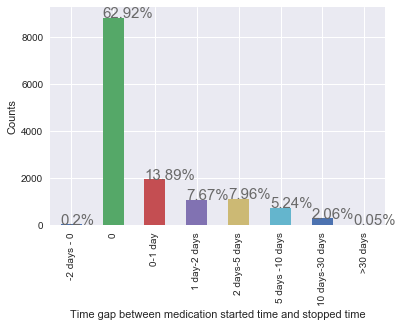

In [70]:
enc_med_cl2['stop_start_gap'] = enc_med_cl2['stop_start_gap'].\
                                apply(total_seconds)
bins = [-24*2, -0.0000001, 0, 1*24, 2*24, 5*24, 10*30, 30*30, 704*24]
time_interval = ['-2 days - 0', '0', '0-1 day', '1 day-2 days',
                 '2 days-5 days', '5 days -10 days', '10 days-30 days',
                 '>30 days']
gap_cutted = pd.cut(enc_med_cl2['stop_start_gap'], bins, labels=time_interval)
ax = pd.value_counts(gap_cutted, sort=False).plot(kind='bar')
bar_annotation(ax, 'percentage')
ax.set_xlabel('Time gap between medication started time and stopped time')
ax.set_ylabel('Counts')

### Time difference is 0

In [72]:
stop_start_gap_0 = enc_med_cl2.query('stop_start_gap==0')  # 8830
print('The number of 0 time difference is 8830')
stop_start_gap_0[['CONSUMED_QUANTITY', 'ORDER_STRENGTH',
                  'DOSE_QUANTITY']].describe()

The number of 0 time difference is 8830


,CONSUMED_QUANTITY,ORDER_STRENGTH,DOSE_QUANTITY
count,8830.000000,4439.000000,8830.000000
mean,9.192299,170.575137,1.504983
std,15.061656,302.728823,1.400988
min,1.000000,0.000000,0.000000
25%,2.000000,4.000000,1.000000
50%,5.000000,10.000000,1.000000
75%,10.000000,400.000000,1.000000
max,506.000000,5600.000000,46.000000


### Time difference < 0

In [127]:
stop_start_gap_negative = enc_med_cl2.query('stop_start_gap < 0')  # 28
print('The number of negative time difference is 28')
stop_start_gap_negative[['MED_STARTED_DT_TM', 'MED_STOPPED_DT_TM',
                         'MED_ENTERED_DT_TM', 'MED_DISCONTINUED_DT_TM',
                         'GENERIC_NAME', 'NDC_CODE', 'MED_ORDER_STATUS_ID',
                         'MED_ORDER_STATUS_DESC', 'DISCONTINUE_REASON_DESC',
                        'ORDER_STOP_TYPE_DESC']]

The number of negative time difference is 28


,MED_STARTED_DT_TM,MED_STOPPED_DT_TM,MED_ENTERED_DT_TM,MED_DISCONTINUED_DT_TM,GENERIC_NAME,NDC_CODE,MED_ORDER_STATUS_ID,MED_ORDER_STATUS_DESC,DISCONTINUE_REASON_DESC,ORDER_STOP_TYPE_DESC
580,2007-02-09 22:00:00,2007-02-09 21:36:00,2/9/2007 21:24,2/9/2007 21:36,dopamine,74780922,4,Discontinued,Discontinued in POE,Hard Stop
3901,2008-01-03 07:00:00,2008-01-03 06:53:00,1/3/2008 6:41,1/3/2008 6:53,norepinephrine,74144304,4,Discontinued,Manual DC,Physician Stop
5522,2003-05-05 14:00:00,2003-05-05 13:49:00,5/5/2003 13:26,5/5/2003 13:49,norepinephrine,74704101,4,Discontinued,Discontinued in POE,Hard Stop
5779,2011-11-04 08:17:00,2011-11-04 07:35:00,11/4/2011 7:17,11/4/2011 7:35,norepinephrine,74704101,4,Discontinued,Manual DC,Physician Stop
5878,2007-02-15 09:00:00,2007-02-15 08:56:00,2/15/2007 8:40,2/15/2007 8:56,norepinephrine,703115303,4,Discontinued,Order was changed,Hard Stop
5880,2007-02-15 12:00:00,2007-02-15 11:20:00,2/15/2007 10:33,2/15/2007 11:20,norepinephrine,703115303,4,Discontinued,Order was changed,Hard Stop
5906,2006-09-24 03:00:00,2006-09-24 02:46:00,9/24/2006 2:26,9/24/2006 2:46,norepinephrine,703115303,4,Discontinued,Order was changed,Hard Stop
5946,2006-02-22 09:00:00,2006-02-22 08:52:00,2/22/2006 8:34,2/22/2006 8:52,norepinephrine,703115303,4,Discontinued,Order was changed,Hard Stop
7727,2001-02-24 10:00:00,2001-02-24 09:42:00,2/24/2001 9:37,2/24/2001 9:42,phenylephrine,24134204,4,Discontinued,Order was changed,Hard Stop
7800,2003-10-13 16:00:00,2003-10-13 15:58:00,10/13/2003 5:08,10/13/2003 15:58,phenylephrine,24134204,4,Discontinued,Order was changed,Hard Stop


It looks like all of them have been discontinued because the discontinued time is equal to the stopped time. See the discontinued reason. Physician stops are
based on entry stop date and time criteria entered. Note the hard stop. 

### Time difference > 2 days

In [76]:
stop_start_gap_exceed2d = enc_med_cl2.query('stop_start_gap > 2*24')
stop_start_gap_exceed2d.shape[0]  # 2149
print('The number of observations that the time difference is over 2 days: 2149')
stop_start_gap_exceed2d[['CONSUMED_QUANTITY', 'ORDER_STRENGTH',
                         'DOSE_QUANTITY']].describe()

The number of observations that the time difference is over 2 days: 2149


,CONSUMED_QUANTITY,ORDER_STRENGTH,DOSE_QUANTITY
count,2149.000000,1540.000000,2149.000000
mean,219.809214,186.812013,4.895300
std,662.898971,280.730391,23.546988
min,1.000000,0.000000,0.000000
25%,11.000000,16.000000,1.000000
50%,40.000000,50.000000,1.000000
75%,156.000000,200.000000,4.000000
max,13760.000000,1600.000000,250.000000


#### Dose frequency

 Roughly check dose frequency = consumed quantity / dose quantity

In [78]:
# Roughly check consumed quantity / dose quantity
stop_start_gap_exceed2d['dose_frequency'] = stop_start_gap_exceed2d[
        'CONSUMED_QUANTITY']/stop_start_gap_exceed2d['DOSE_QUANTITY']
stop_start_gap_exceed2d[['dose_frequency']].describe()

C:\Users\gzhu1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dose_frequency
count,2149.000000
mean,inf
std,NaN
min,0.012000
25%,6.000000
50%,20.000000
75%,99.000000
max,inf


#### Infusion period

Roughly guess the infusion time = stop_start_gap/ dose_frequency

In [79]:

stop_start_gap_exceed2d['infusion_period'] = stop_start_gap_exceed2d.eval(
        'stop_start_gap/dose_frequency')
stop_start_gap_exceed2d[['infusion_period']].describe()

C:\Users\gzhu1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,infusion_period
count,2149.000000
mean,118.451532
std,1807.014925
min,0.000000
25%,1.157792
50%,7.055556
75%,21.185417
max,59998.611111


## Total dispensed doses

### Distribution

In [82]:
num_na = sum(enc_med_cl2['TOTAL_DISPENSED_DOSES'] == 0)  # 10
print('Number of missing value is {}'.format(num_na))
enc_med_cl2[['TOTAL_DISPENSED_DOSES']].describe()

Number of missing value is 10


,TOTAL_DISPENSED_DOSES
count,14168.000000
mean,16.213015
std,44.329715
min,0.000000
25%,2.000000
50%,6.000000
75%,13.000000
max,1050.000000


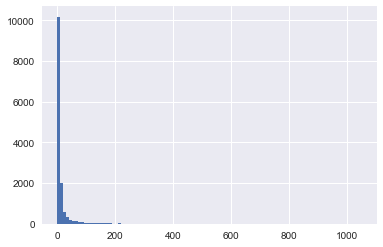

In [83]:
enc_med_cl2['TOTAL_DISPENSED_DOSES'].hist(bins=100)

Text(0,0.5,'Counts')

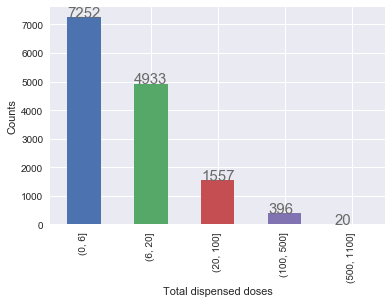

In [87]:
bins = [0, 6, 20, 100, 500, 1100]
bins_counts = pd.cut(enc_med_cl2['TOTAL_DISPENSED_DOSES'], bins)
ax1 = pd.value_counts(bins_counts, sort=False).plot(kind='bar')
bar_annotation(ax1, 'number')
ax1.set_xlabel('Total dispensed doses')
ax1.set_ylabel('Counts')

### Dose quantity is larger than total dispensed doses

In [89]:
dq_exceed_tdd_ind = enc_med_cl2['DOSE_QUANTITY'] >\
                     enc_med_cl2['TOTAL_DISPENSED_DOSES']
dq_exceed_tdd = enc_med_cl2[dq_exceed_tdd_ind]
print('Number of observations in this scenario: {}'.format(
    dq_exceed_tdd.shape[0]))  # 1468
dq_exceed_tdd[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY',
             'TOTAL_DISPENSED_DOSES', 'ORDER_STRENGTH', 'ORDER_VOLUME',
             'PRODUCT_STRENGTH_DESCRIPTION', 'ROUTE_DESCRIPTION']]

Number of observations in this scenario: 1468


,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,TOTAL_DISPENSED_DOSES,ORDER_STRENGTH,ORDER_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,ROUTE_DESCRIPTION
12,74910420,2,2,1,800.0,20.0,40 mg/ml,intravenous
15,74910420,2,2,1,800.0,20.0,40 mg/ml,intravenous
16,74910420,2,2,1,800.0,20.0,40 mg/ml,intravenous
17,74910420,2,2,1,800.0,20.0,40 mg/ml,intravenous
23,517180525,4,4,1,800.0,20.0,40 mg/ml,intravenous
24,517180525,4,4,1,800.0,20.0,40 mg/ml,intravenous
27,517180525,4,4,1,800.0,20.0,40 mg/ml,intravenous
28,517180525,4,4,1,800.0,20.0,40 mg/ml,intravenous
29,517180525,4,4,1,800.0,20.0,40 mg/ml,intravenous
30,517180525,4,4,1,800.0,20.0,40 mg/ml,intravenous


Some of the NDC codes are retired and I can't find them online. Any way sloves this? For NDC code 517180525, https://dailymed.nlm.nih.gov/dailymed/drugInfo.cfm?setid=e061fb3e-afd7-4188-b5fb-617ac1d3e38d&audience=consumer , conclude that the total dispensed dose may not be reliable. But we can regard it as reference variable to verify other variables' values. 

### Total dispensed dose is over 500

In [93]:
tdd_over500 = enc_med_cl2.query('TOTAL_DISPENSED_DOSES>500')
print('The number of observations in this scenario: {}'.format(
        tdd_over500.shape[0]))
tdd_over500[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY',
             'TOTAL_DISPENSED_DOSES', 'ORDER_STRENGTH', 'ORDER_VOLUME',
             'PRODUCT_STRENGTH_DESCRIPTION', 'ROUTE_DESCRIPTION',
             'stop_start_gap']]

The number of observations in this scenario: 20


,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,TOTAL_DISPENSED_DOSES,ORDER_STRENGTH,ORDER_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,ROUTE_DESCRIPTION,stop_start_gap
701,74780922,1,546,546,400.0,250.0,5%-160 mg/100 ml,intravenous,500.150000
4245,74144304,16,10560,660,64.0,0.0,1 mg/ml,intravenous,162.983333
6164,55390000210,1,3480,870,NaN,250.0,1 mg/ml,intravenous,NaN
6245,55390000210,1,2040,510,NaN,250.0,1 mg/ml,intravenous,63.883333
6246,55390000210,1,4320,560,NaN,250.0,1 mg/ml,intravenous,124.483333
6287,55390000210,1,4200,1050,NaN,250.0,1 mg/ml,intravenous,681.450000
6484,55390000210,1,570,570,NaN,250.0,1 mg/ml,intravenous,101.066667
6696,55390000210,1,2320,580,NaN,250.0,1 mg/ml,intravenous,396.766667
6701,55390000210,1,2280,570,NaN,250.0,1 mg/ml,intravenous,372.300000
7231,36000016210,1,913,913,NaN,250.0,NaN,intravenous,342.966667


Note the time difference between medication start time and medication stop time and the consumed quantity. So it is reasonable for these large total dispensed doses. Also look at the relationship between consumed quantity and total dispensed doses. Some of them are equal while some of them are the multiple of the other. 

## Consumed quantity

One important point regarding consumed quantity is itself has been filtered in the table enc_med_cl2. The criterion of this table given by Laila is consumed quantity larger than 0 and the order status not be 2 or 14(meaning cancled). It is a derived variable. Consumed quantity = charge quantity-credit quantity. It is highly related to total dispensed doses as described before. 

### Distribution

In [96]:
print('Number of missing value is {}'.format(
    sum(enc_med_cl2['CONSUMED_QUANTITY'].isnull())))
enc_med_cl2[['CONSUMED_QUANTITY']].describe()

Number of missing value is 0


,CONSUMED_QUANTITY
count,14168.000000
mean,50.938171
std,285.323085
min,1.000000
25%,3.000000
50%,8.000000
75%,20.000000
max,13760.000000


In [98]:
print('Top ten consumed quantity in terms of counts:\n{}'.format
      (enc_med_cl2['CONSUMED_QUANTITY'].value_counts(dropna=False)[0:9,]))

Top ten consumed quantity in terms of counts:
1     2276
4     1541
14     948
2      856
8      834
3      818
7      711
10     566
9      463
6      402
Name: CONSUMED_QUANTITY, dtype: int64


Text(0,0.5,'Counts')

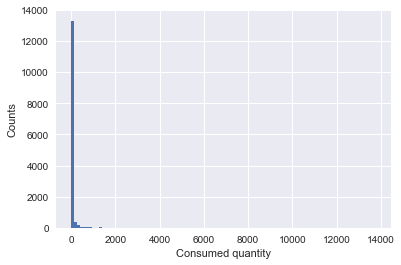

In [100]:
ax0=enc_med_cl2['CONSUMED_QUANTITY'].hist(bins=100)
ax0.set_xlabel('Consumed quantity')
ax0.set_ylabel('Counts')

Text(0,0.5,'Counts')

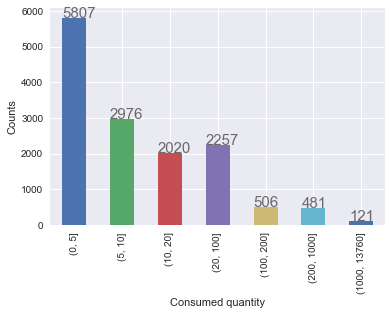

In [101]:
bins = [0, 5, 10, 20, 100, 200, 1000, 13760]
bins_counts = pd.cut(enc_med_cl2['CONSUMED_QUANTITY'], bins)
ax1 = pd.value_counts(bins_counts, sort=False).plot(kind='bar')
bar_annotation(ax1, 'number')
ax1.set_xlabel('Consumed quantity')
ax1.set_ylabel('Counts')

### Consumed quantity > 1000

In [102]:
cq_over1000 = enc_med_cl2.query('CONSUMED_QUANTITY>1000')
print('The number of observations where consumed quantity > 1000: {}'.format(
    cq_over1000.shape[0]))  # 121

The number of observations where consumed quantity > 1000: 121


In [104]:
cq_over1000[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY',
             'ORDER_STRENGTH', 'ORDER_VOLUME', 'PRODUCT_STRENGTH_DESCRIPTION',
             'ROUTE_DESCRIPTION', 'TOTAL_DISPENSED_DOSES',
             'stop_start_gap']]

,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,ORDER_STRENGTH,ORDER_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,ROUTE_DESCRIPTION,TOTAL_DISPENSED_DOSES,stop_start_gap
2609,409144304,8,1056,32.0,32.0,1 mg/mL,intravenous,66,71.983333
2976,409337504,1,1344,NaN,234.0,1 mg/mL,intravenous,384,359.733333
3262,24112302,8,1008,32.0,32.0,1 mg/ml,intravenous,71,248.500000
3435,74144304,4,1008,16.0,16.0,1 mg/ml,intravenous,126,214.250000
4112,74144304,16,2880,64.0,0.0,1 mg/ml,intravenous,90,24.900000
4114,74144304,4,1360,16.0,0.0,1 mg/ml,intravenous,170,69.716667
4124,74144304,4,2000,16.0,0.0,1 mg/ml,intravenous,250,83.683333
4125,74144304,16,13760,64.0,0.0,1 mg/ml,intravenous,430,233.683333
4134,74144304,4,2400,16.0,0.0,1 mg/ml,intravenous,300,122.666667
4147,74144304,16,2880,64.0,0.0,1 mg/ml,intravenous,90,91.500000


It is found that total dispensed doses is far less than the consumed quantity though the total dispensed doses is large. 


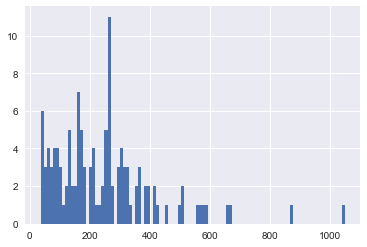

In [111]:
cq_over1000['TOTAL_DISPENSED_DOSES'].hist(bins=100)

In [108]:
cq_over1000.groupby('PRODUCT_STRENGTH_DESCRIPTION')['NDC_CODE'].value_counts()

PRODUCT_STRENGTH_DESCRIPTION  NDC_CODE   
1 mg/mL                       409144304       1
                              409337504       1
1 mg/ml                       55390000210    39
                              74144304       28
                              24112302        1
                              74704101        1
                              703115303       1
10 mg/mL                      409180001       6
                              66758001604     4
10 mg/ml                      10019016312    14
                              703163104      13
                              517040525       3
                              517029925       1
                              641048225       1
Name: NDC_CODE, dtype: int64

The dominating NDC codes are not found online. 

#### stop_start_gap

In [106]:
print('The percentile of stop_start_gap in this scenario: \n{}'.format(
cq_over1000['stop_start_gap'].describe()))

The percentile of stop_start_gap in this scenario: 
count    118.000000
mean     171.014972
std      118.613052
min       11.983333
25%       72.237500
50%      142.025000
75%      234.625000
max      681.450000
Name: stop_start_gap, dtype: float64


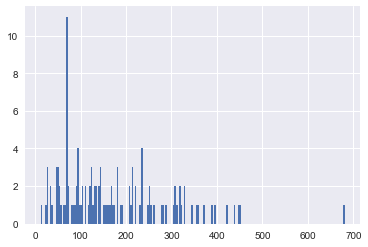

In [109]:
cq_over1000['stop_start_gap'].hist(bins=200)

#### Dose quantity

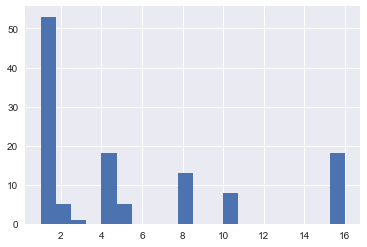

In [112]:
cq_over1000['DOSE_QUANTITY'].hist(bins=20)

#### Dose frequency

Note it is my rough inference. 

In [105]:
# Roughly check consumed quantity / dose quantity
cq_over1000['dose_frequency'] = cq_over1000['CONSUMED_QUANTITY']/cq_over1000['DOSE_QUANTITY']
cq_over1000[['dose_frequency']].describe()

C:\Users\gzhu1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dose_frequency
count,121.000000
mean,978.686777
std,919.888724
min,72.000000
25%,294.000000
50%,620.000000
75%,1360.000000
max,4320.000000


#### Infusion period

Note it is my rough inference. 

In [107]:
cq_over1000['infusion_period'] = cq_over1000.eval(
        'stop_start_gap/dose_frequency')
cq_over1000[['infusion_period']].describe()

C:\Users\gzhu1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,infusion_period
count,118.000000
mean,0.394607
std,0.493697
min,0.018189
25%,0.096896
50%,0.204747
75%,0.548498
max,3.596250


From the respective of infusion period, the consumed quantity is suspicious. 

## Order strength

Now we assume the unit for the strength is mg, later I will prove it.


### Different values and according counts

Note the number of missing values.

In [12]:
enc_med_cl2['ORDER_STRENGTH'].value_counts(dropna=False)

NaN           6012
 800.0000     1065
 400.0000      933
 8.0000        862
 2.0000        812
 4.0000        777
 40.0000       638
 10.0000       609
 50.0000       553
 16.0000       522
 20.0000       279
 80.0000       265
 100.0000      193
 1.0000        108
 0.0000         88
 200.0000       81
 160.0000       53
 32.0000        45
 0.1000         43
 30.0000        39
 64.0000        31
 12.0000        13
 0.2000         12
 1600.0000      11
 120.0000       10
              ... 
 5.5800          1
 70.0000         1
 38.7400         1
 0.3105          1
 0.4150          1
 4000.0000       1
 11.4400         1
 4.3300          1
 0.2064          1
 0.5400          1
 2.7150          1
 6.9400          1
 138.5795        1
 1.2000          1
 0.1649          1
 0.3240          1
 0.8100          1
 5.4500          1
 1000.0000       1
 6.4200          1
 4.3650          1
 20.5750         1
 191.2000        1
 13.1750         1
 5.5348          1
Name: ORDER_STRENGTH, Length: 1

### Distribution


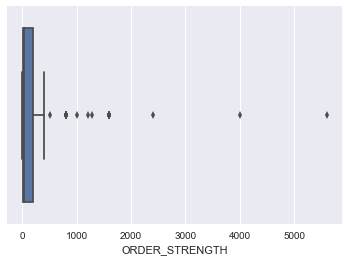

In [13]:
sns.boxplot(enc_med_cl2['ORDER_STRENGTH'])

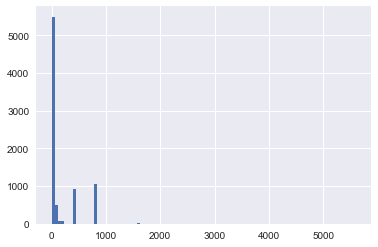

In [14]:
enc_med_cl2['ORDER_STRENGTH'].hist(bins=100)

In [16]:
enc_med_cl2['ORDER_STRENGTH'].describe()

count    8156.000000
mean      173.842733
std       289.181635
min         0.000000
25%         8.000000
50%        20.000000
75%       200.000000
max      5600.000000
Name: ORDER_STRENGTH, dtype: float64

Text(0,0.5,'Counts')

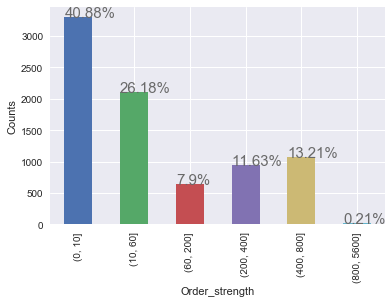

In [17]:
bins = [0, 10, 60, 200, 400, 800, 5600]
enc_med_cl2['order_strength_cutted'] = pd.cut(
        enc_med_cl2['ORDER_STRENGTH'], bins)
ax1 = pd.value_counts(enc_med_cl2['order_strength_cutted'],
                      sort=False).plot(kind='bar')
bar_annotation(ax1, 'percentage')
ax1.set_xlabel('Order_strength')
ax1.set_ylabel('Counts')

### Detail

#### The relationship between order strength and route description: 

In [18]:
enc_med_cl2.groupby(['order_strength_cutted'])[
        'ROUTE_DESCRIPTION'].value_counts(dropna=False)

order_strength_cutted  ROUTE_DESCRIPTION
(0, 10]                intravenous          1792
                       injectable           1442
                       NaN                    64
(10, 60]               injectable           1556
                       intravenous           554
                       NaN                     2
(60, 200]              injectable            502
                       intravenous            97
                       NaN                    38
(200, 400]             intravenous           930
                       injectable              7
                       NaN                     1
(400, 800]             intravenous          1065
                       NaN                     1
(800, 5600]            intravenous            15
                       injectable              2
Name: ROUTE_DESCRIPTION, dtype: int64

#### Extreme values of order strength

##### order strength is over 800

In [24]:
threshold = 800
# order strength > 800
os_over800 = enc_med_cl2.query('ORDER_STRENGTH > @threshold')
print('The number of observations whose order strength is over 800: {}'.format(
        os_over800.shape[0]))
os_over800[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY', 'ORDER_STRENGTH',
            'ORDER_VOLUME', 'PRODUCT_STRENGTH_DESCRIPTION', 'TOTAL_DISPENSED_DOSES',
            'ROUTE_DESCRIPTION']]

The number of observations whose order strength is over 800: 17


,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,ORDER_STRENGTH,ORDER_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,TOTAL_DISPENSED_DOSES,ROUTE_DESCRIPTION
33,517180525,8,24,1600.0,40.0,40 mg/ml,3,intravenous
98,517180525,5,5,1000.0,25.0,40 mg/ml,1,intravenous
1040,338100702,4,32,1600.0,1000.0,5%-160 mg/100 ml,8,intravenous
1854,338100902,2,14,1600.0,500.0,5%-320 mg/100 ml,7,intravenous
1874,338100902,3,3,2400.0,750.0,5%-320 mg/100 ml,1,intravenous
1894,338100902,2,2,1600.0,500.0,5%-320 mg/100 ml,1,intravenous
2027,338100902,7,7,5600.0,1750.0,5%-320 mg/100 ml,1,intravenous
2104,338100902,5,5,4000.0,1250.0,5%-320 mg/100 ml,1,intravenous
2115,338100902,2,2,1600.0,500.0,5%-320 mg/100 ml,1,intravenous
2127,338100902,2,2,1600.0,500.0,5%-320 mg/100 ml,1,intravenous


All of them are strong in concentration. So it seems like the medicine with NDC code 338100902 is strong. One of the observations with route administration as injection is suspicious. One is wrong for the order strength. Note the consumed quantity.

_consumed quantity_


In [21]:
os_over800['CONSUMED_QUANTITY'].describe()

count     17.000000
mean      14.705882
std       30.417439
min        2.000000
25%        2.000000
50%        5.000000
75%       10.000000
max      128.000000
Name: CONSUMED_QUANTITY, dtype: float64

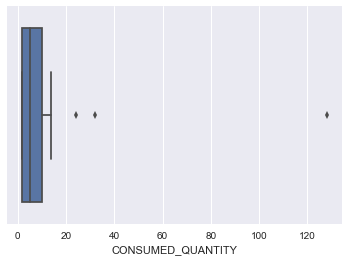

In [22]:
sns.boxplot(os_over800['CONSUMED_QUANTITY'])

_gap between stop time and start time_

In [25]:
os_over800['stop_start_gap'].describe()

count     17.000000
mean      47.186275
std      174.239873
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      720.000000
Name: stop_start_gap, dtype: float64

##### Order strength = 800


Number of observations: 1065

In [33]:
# order strength = 800
os_800 = enc_med_cl2.query('ORDER_STRENGTH == @threshold')
print('The number of observations whose order strength is 800: {}'.format(
        os_800.shape[0]))
os_800[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY', 'ORDER_STRENGTH', 'TOTAL_DISPENSED_DOSES',
        'ORDER_VOLUME', 'PRODUCT_STRENGTH_DESCRIPTION', 'ROUTE_DESCRIPTION']]

The number of observations whose order strength is 800: 1065


,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,ORDER_STRENGTH,TOTAL_DISPENSED_DOSES,ORDER_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,ROUTE_DESCRIPTION
0,517130525,1,7,800.0,7,NaN,160 mg/ml,intravenous
1,517130525,1,10,800.0,220,5.0,160 mg/ml,intravenous
2,517130525,1,7,800.0,7,NaN,160 mg/ml,intravenous
3,517130525,1,7,800.0,7,NaN,160 mg/ml,intravenous
11,74582010,1,24,800.0,12,500.0,40 mg/ml,intravenous
12,74910420,2,2,800.0,1,20.0,40 mg/ml,intravenous
13,74910420,2,4,800.0,2,20.0,40 mg/ml,intravenous
14,74910420,2,4,800.0,2,20.0,40 mg/ml,intravenous
15,74910420,2,2,800.0,1,20.0,40 mg/ml,intravenous
16,74910420,2,2,800.0,1,20.0,40 mg/ml,intravenous


Look at the concentration

In [50]:
print("The value counts of concentration: \n{}".format(
        os_800['PRODUCT_STRENGTH_DESCRIPTION'].value_counts()))


The value counts of concentration: 
5%-320 mg/100 ml    880
40 mg/ml             68
80 mg/ml             38
5%-160 mg/100 mL     33
5%-320 mg/100 mL     24
5%-160 mg/100 ml     18
160 mg/ml             4
Name: PRODUCT_STRENGTH_DESCRIPTION, dtype: int64


See their association with concentration, NDC code and order volume

In [36]:
os_800.groupby(['PRODUCT_STRENGTH_DESCRIPTION', 'NDC_CODE'])[
        'ORDER_VOLUME'].value_counts(dropna=False)

PRODUCT_STRENGTH_DESCRIPTION  NDC_CODE   ORDER_VOLUME
160 mg/ml                     517130525  NaN               3
                                         5.0               1
40 mg/ml                      74582010   500.0             1
                              74910420   20.0              7
                              517180525  20.0             59
                                         0.0               1
5%-160 mg/100 ml              74780922   500.0             1
                              74780924   500.0             5
                              338100702  500.0             3
                              338100703  NaN               5
                                         500.0             4
                              409780924  500.0            33
5%-320 mg/100 ml              74781022   10.0            190
                                         0.0             139
                                         250.0           110
                               

Pay attention to the concentration '5%-320 mg/100 ml' and NDC code with 74781022.   
Value counts of dose quantity of concentration with '5%-320 mg/100 ml': 

In [37]:
os_800_pst320 = os_800.query(
        'PRODUCT_STRENGTH_DESCRIPTION =="5%-320 mg/100 ml"')
os_800_pst320['DOSE_QUANTITY'].value_counts()

1    904
Name: DOSE_QUANTITY, dtype: int64

NDC code = 74781022. Number of observations: 452. Be aware of order volume and total volume. 

In [38]:
NDC_CODE_74781022 = os_800.query('NDC_CODE==74781022')
NDC_CODE_74781022[['NDC_CODE', 'DOSE_QUANTITY', 'CONSUMED_QUANTITY',
                   'ORDER_STRENGTH', 'ORDER_VOLUME', 'TOTAL_VOLUME',
                   'PRODUCT_STRENGTH_DESCRIPTION', 'ROUTE_DESCRIPTION']]

,NDC_CODE,DOSE_QUANTITY,CONSUMED_QUANTITY,ORDER_STRENGTH,ORDER_VOLUME,TOTAL_VOLUME,PRODUCT_STRENGTH_DESCRIPTION,ROUTE_DESCRIPTION
1356,74781022,1,1,800.0,250.0,0,5%-320 mg/100 ml,intravenous
1357,74781022,1,1,800.0,250.0,0,5%-320 mg/100 ml,intravenous
1358,74781022,1,1,800.0,250.0,0,5%-320 mg/100 ml,intravenous
1359,74781022,1,1,800.0,250.0,0,5%-320 mg/100 ml,intravenous
1360,74781022,1,1,800.0,0.0,0,5%-320 mg/100 ml,intravenous
1361,74781022,1,1,800.0,0.0,0,5%-320 mg/100 ml,intravenous
1362,74781022,1,2,800.0,0.0,250,5%-320 mg/100 ml,intravenous
1363,74781022,1,1,800.0,0.0,0,5%-320 mg/100 ml,intravenous
1364,74781022,1,2,800.0,0.0,250,5%-320 mg/100 ml,intravenous
1365,74781022,1,1,800.0,0.0,0,5%-320 mg/100 ml,intravenous


###### Check the consumed quantity

In [39]:
os_800[['CONSUMED_QUANTITY']].describe()

count    1065.000000
mean       11.259155
std        41.551020
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       720.000000
Name: CONSUMED_QUANTITY, dtype: float64

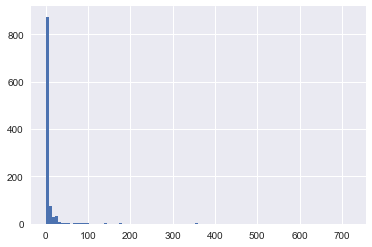

In [41]:
os_800['CONSUMED_QUANTITY'].hist(bins=100)

Text(0,0.5,'Counts')

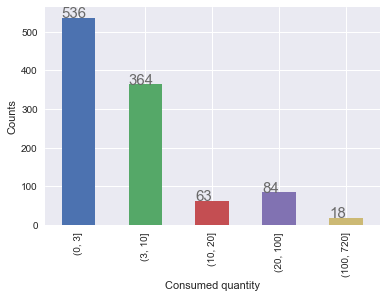

In [42]:
bins = [0, 3, 10, 20, 100, 720]
bins_vector = pd.cut(os_800['CONSUMED_QUANTITY'], bins)
ax1 = pd.value_counts(bins_vector, sort=False).plot(kind='bar')
bar_annotation(ax1, 'number')
ax1.set_xlabel('Consumed quantity')
ax1.set_ylabel('Counts')

We can use the total dispensed doses, initial dose quantity and time gap between the medication strarted time and stopped time to double check. 

In [38]:
os_800[['stop_start_gap', 'TOTAL_DISPENSED_DOSES']].describe()

,stop_start_gap,TOTAL_DISPENSED_DOSES
count,1051.000000,1065.000000
mean,48.134967,7.313615
std,115.061078,18.534647
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,36.550000,7.000000
max,1020.383333,259.000000


Text(0,0.5,'Counts')

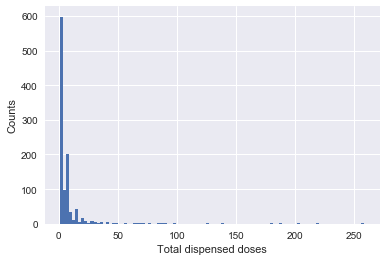

In [36]:
%matplotlib inline
ax = os_800['TOTAL_DISPENSED_DOSES'].hist(bins=100)
ax.set_xlabel('Total dispensed doses')
ax.set_ylabel('Counts')


Text(0,0.5,'Counts')

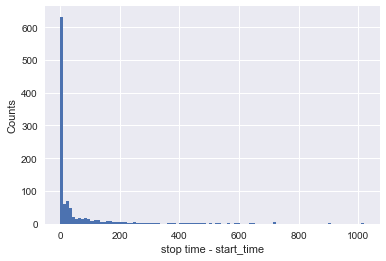

In [37]:
ax = os_800['stop_start_gap'].hist(bins=100)
ax.set_xlabel('stop time - start_time')
ax.set_ylabel('Counts')

## Dose quantity

In [39]:
enc_med_cl2[['DOSE_QUANTITY']].describe()

,DOSE_QUANTITY
count,14168.000000
mean,2.751623
std,15.366580
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,500.000000


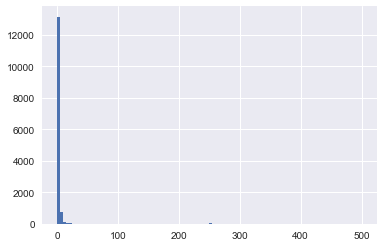

In [40]:
enc_med_cl2['DOSE_QUANTITY'].hist(bins=100)

In [46]:
missing_num = sum(enc_med_cl2['DOSE_QUANTITY'].isnull() |
                  enc_med_cl2['DOSE_QUANTITY'] == 0)
print('The missing number of dose quantity is: {}'.format(missing_num))
print("Top ten dose quantity in terms of counts: \n{}".format(
        enc_med_cl2['DOSE_QUANTITY'].value_counts(dropna=False)[0:10, ]))

The missing number of dose quantity is: 16
Top ten dose quantity in terms of counts: 
1      10222
2       1777
4       1034
5        398
8        313
10       122
3        108
16        79
250       46
20        26
Name: DOSE_QUANTITY, dtype: int64


Text(0,0.5,'Counts')

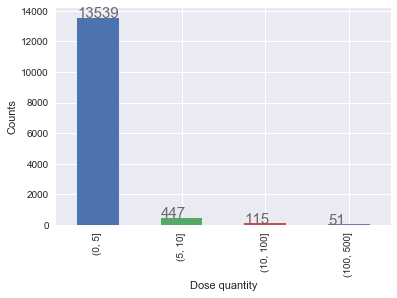

In [47]:
bins = [0, 5, 10, 100, 500]
bins_counts = pd.cut(enc_med_cl2['DOSE_QUANTITY'], bins)
ax1 = pd.value_counts(bins_counts, sort=False).plot(kind='bar')
bar_annotation(ax1, 'number')
ax1.set_xlabel('Dose quantity')
ax1.set_ylabel('Counts')

### Dose quantity over 10

In [54]:
threshold = 10
dq_over10 = enc_med_cl2.query('DOSE_QUANTITY > @threshold')
print('The number of extreme values of dose quantity is : {}'.format(
        dq_over10.shape[0]))
print("The value counts of dose quantity which is over 10: \n{}".format(
        dq_over10['DOSE_QUANTITY'].value_counts()))

The number of extreme values of dose quantity is : 166
The value counts of dose quantity which is over 10: 
16     79
250    46
20     26
254     3
32      3
40      2
12      2
500     1
128     1
46      1
25      1
13      1
Name: DOSE_QUANTITY, dtype: int64


Pay speciall attention to dose quantity 250. 

In [116]:
dq_250 = dq_over10.query('DOSE_QUANTITY>=250')
dq_250[['ENCOUNTER_ID', 'NDC_CODE','PRODUCT_STRENGTH_DESCRIPTION',
                'ORDER_STRENGTH', 'CONSUMED_QUANTITY', 'TOTAL_DISPENSED_DOSES',
                'ORDER_VOLUME', 'DOSE_QUANTITY','ROUTE_DESCRIPTION']]

,ENCOUNTER_ID,NDC_CODE,PRODUCT_STRENGTH_DESCRIPTION,ORDER_STRENGTH,CONSUMED_QUANTITY,TOTAL_DISPENSED_DOSES,ORDER_VOLUME,DOSE_QUANTITY,ROUTE_DESCRIPTION
301,287085627,409780922,5%-160 mg/100 mL,NaN,6,6,250.0,250,intravenous
4973,343025667,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,16,24,250.0,250,injectable
5124,348857201,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,8,8,250.0,250,injectable
5194,355146739,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,4,4,250.0,250,injectable
5213,355180335,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,4,4,250.0,250,injectable
5241,355235117,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,4,4,250.0,250,injectable
5374,364906949,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,4,4,250.0,250,injectable
5393,365014452,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,16,24,250.0,250,injectable
5406,365122024,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,4,12,250.0,250,injectable
5416,365199358,61553013461,4 mg/250 mL-NaCl 0.9%,NaN,12,20,250.0,250,injectable


So from the route description and consumed quantity, strongly think they are mistakes. It is verified these 50 observations are either not from the same hospital or from the same encounter id. So the other observations with the same NDC codes as that in above table may give some clues. 

In [120]:
dq_250_ndc = dq_250['NDC_CODE'].unique()
fulltable_with_dq_250_ndc = enc_med_cl2[enc_med_cl2['NDC_CODE'].isin(dq_250_ndc)]
fulltable_with_dq_250_ndc[['ENCOUNTER_ID', 'NDC_CODE','PRODUCT_STRENGTH_DESCRIPTION',
                'ORDER_STRENGTH', 'CONSUMED_QUANTITY', 'TOTAL_DISPENSED_DOSES',
                'ORDER_VOLUME', 'DOSE_QUANTITY','ROUTE_DESCRIPTION']]

,ENCOUNTER_ID,NDC_CODE,PRODUCT_STRENGTH_DESCRIPTION,ORDER_STRENGTH,CONSUMED_QUANTITY,TOTAL_DISPENSED_DOSES,ORDER_VOLUME,DOSE_QUANTITY,ROUTE_DESCRIPTION
141,29222921,409780922,5%-160 mg/100 mL,400.0,1,1,250.0,1,intravenous
142,62688006,409780922,5%-160 mg/100 mL,400.0,10,10,250.0,1,intravenous
143,79558155,409780922,5%-160 mg/100 mL,400.0,1,1,250.0,1,intravenous
144,97485010,409780922,5%-160 mg/100 mL,0.0,3,3,250.0,1,intravenous
145,97661056,409780922,5%-160 mg/100 mL,0.0,1,1,250.0,1,intravenous
146,98537489,409780922,5%-160 mg/100 mL,0.0,1,1,250.0,1,intravenous
147,98537489,409780922,5%-160 mg/100 mL,0.0,2,2,250.0,1,intravenous
148,98870509,409780922,5%-160 mg/100 mL,0.0,2,1,250.0,1,intravenous
149,98870509,409780922,5%-160 mg/100 mL,0.0,2,2,250.0,1,intravenous
150,99858159,409780922,5%-160 mg/100 mL,0.0,2,1,250.0,1,intravenous


Text(0,0.5,'Counts')

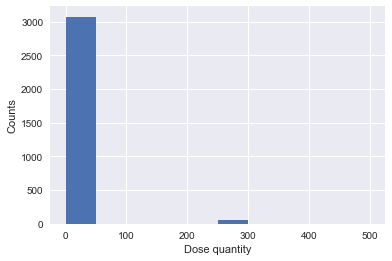

In [124]:
ax = fulltable_with_dq_250_ndc['DOSE_QUANTITY'].hist()
ax.set_xlabel('Dose quantity')
ax.set_ylabel('Counts')

Therefore we have reasons to believe these extreme dose quantities are wrong. 

## Strength units

In [128]:
print("Value counts of strength units:\n{}".format(
    enc_med_cl2['STRENGTH_UNITS'].value_counts(dropna=False)))

value counts of strength units:
mg            8005
NaN           6100
ug              60
Not Mapped       3
Name: STRENGTH_UNITS, dtype: int64


In [129]:
NAs = enc_med_cl2[(enc_med_cl2["STRENGTH_UNITS"] == "Not Mapped") |
                  enc_med_cl2["STRENGTH_UNITS"].isnull()]
ug = enc_med_cl2[enc_med_cl2["STRENGTH_UNITS"] == "ug"]
ug['PRODUCT_STRENGTH_DESCRIPTION'].value_counts(dropna=False)
mg = enc_med_cl2[enc_med_cl2["STRENGTH_UNITS"] == "mg"]

### Comparison of consumed quantity among the NA, ug and mg groups

In [131]:
ug_mg_na_cq = pd.DataFrame({'consumed_quantity_NA': NAs['CONSUMED_QUANTITY'],
                        'consumed_quantity_ug': ug['CONSUMED_QUANTITY'],
                        'consumed_quantity_mg': mg['CONSUMED_QUANTITY']})
ug_mg_na_cq.describe()

,consumed_quantity_NA,consumed_quantity_ug,consumed_quantity_mg
count,6103.000000,60.000000,8005.00000
mean,57.159594,6.416667,46.52867
std,205.896000,4.507213,334.23104
min,1.000000,2.000000,1.00000
25%,4.000000,2.750000,1.00000
50%,10.000000,4.000000,6.00000
75%,30.000000,9.000000,14.00000
max,4320.000000,22.000000,13760.00000


It suggests that the unit with ug may be wrong. We also can see it from the order strength.

### Comparison of order strength among the NA, ug and mg groups

In [132]:
ug_mg_na_os = pd.DataFrame({'order_strength_NA': NAs['ORDER_STRENGTH'],
                        'order_strength_ug': ug['ORDER_STRENGTH'],
                        'order_strength_mg': mg['ORDER_STRENGTH']})
ug_mg_na_os.describe()


,order_strength_NA,order_strength_ug,order_strength_mg
count,91.000000,60.000000,8005.000000
mean,0.131868,159.416667,175.925588
std,0.718158,158.990703,290.978279
min,0.000000,40.000000,0.050000
25%,0.000000,100.000000,8.000000
50%,0.000000,100.000000,20.000000
75%,0.000000,200.000000,400.000000
max,4.000000,1200.000000,5600.000000


Notice that there are many missing value of order strength in NA group of strength unit. Actually the 6100 observations with missing order strength and 6103 observations with missing unit strength, 6100 of them miss simultaneously. The remaining 3 have order strength but with unit strength displayed as "Not mapped". 

### Impute the NAs

Actually from above analysis, we have infered that there is only one reasonable unit for strength, that is mg. The NAs should be NAs. We can verify this guess by mapping the strength unit to the product strength description. 

In [133]:
enc_med_cl2.groupby('PRODUCT_STRENGTH_DESCRIPTION')[
        'STRENGTH_UNITS'].value_counts(dropna=False)

PRODUCT_STRENGTH_DESCRIPTION  STRENGTH_UNITS
1 mg/mL                       NaN                383
                              mg                 213
1 mg/ml                       mg                2057
                              NaN                913
                              Not Mapped           3
10 mg/mL                      NaN                637
                              mg                 148
                              ug                  15
10 mg/ml                      mg                3229
                              NaN               1245
                              ug                   3
100 mcg/mL-NaCl 0.9%          NaN                  4
                              mg                   3
160 mg/ml                     mg                   4
4 mg/250 mL-NaCl 0.9%         NaN                678
40 mg/mL                      NaN                  6
40 mg/ml                      mg                 130
                              NaN                  2
5

## Order volume

### Distribution 

In [134]:
ov_na = sum(enc_med_cl2['ORDER_VOLUME'].isnull())  # 4500
print('Missing number of order volume : {}'.format(ov_na))
enc_med_cl2[['ORDER_VOLUME']].describe()

Missing number of order volume : 4500


,ORDER_VOLUME
count,9668.000000
mean,105.124034
std,131.393514
min,0.000000
25%,2.000000
50%,8.000000
75%,250.000000
max,1750.000000


Text(0,0.5,'Count')

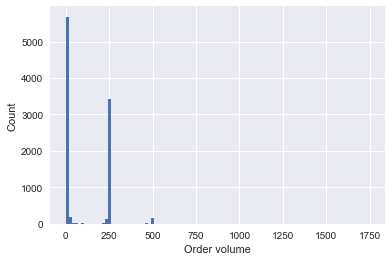

In [135]:
ax = enc_med_cl2['ORDER_VOLUME'].hist(bins=100)
ax.set_xlabel('Order volume')
ax.set_ylabel('Count')

In [136]:
print("Top ten order volume value in terms of counts: \n{}".format(
        enc_med_cl2['ORDER_VOLUME'].value_counts(dropna=False)[0:10, ]))

Top ten order volume value in terms of counts: 
NaN       4500
 250.0    3414
 8.0      1019
 4.0       924
 0.0       714
 0.2       658
 1.0       608
 5.0       464
 10.0      450
 2.0       405
Name: ORDER_VOLUME, dtype: int64


Text(0,0.5,'Counts')

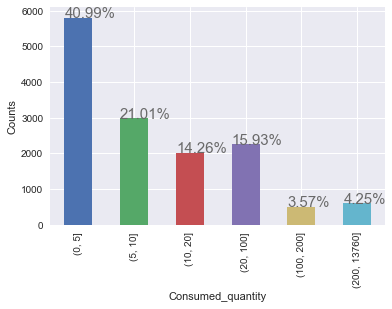

In [137]:
bins = [0, 5, 10, 20, 100, 200, 13760]
bins_counts = pd.cut(enc_med_cl2['CONSUMED_QUANTITY'], bins)
ax1 = pd.value_counts(bins_counts, sort=False).plot(kind='bar')
bar_annotation(ax1, 'percentage')
ax1.set_xlabel('Consumed_quantity')
ax1.set_ylabel('Counts')

## Total volume

### Distribution

No missing value. It may be useful for deriving fluid quantity, combining with order strength. How dose the variable Sum_IVF in patient table derived? is it correct?  

In [138]:
enc_med_cl2[['TOTAL_VOLUME']].describe()

,TOTAL_VOLUME
count,14168.000000
mean,108.893069
std,153.125510
min,0.000000
25%,0.000000
50%,0.000000
75%,250.000000
max,1080.000000


In [140]:
total_volume_0 = enc_med_cl2.query('TOTAL_VOLUME == 0')
total_volume_0.shape[0]
print('The number of zero value  of total volume is :{}'.format(
        total_volume_0.shape[0]))

The number of zero value  of total volume is :8412


Text(0,0.5,'Counts')

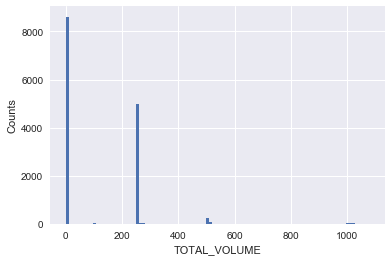

In [142]:
ax = enc_med_cl2['TOTAL_VOLUME'].hist(bins=100)
ax.set_xlabel('TOTAL_VOLUME')
ax.set_ylabel('Counts')

In [143]:
print("Top ten total volume value in terms of counts: \n{}".format(
        enc_med_cl2['TOTAL_VOLUME'].value_counts()[0:10, ]))

Top ten order volume value in terms of counts: 
0       8412
250     4017
255      386
254      234
500      210
258      204
2        114
252       92
1000      51
251       45
Name: TOTAL_VOLUME, dtype: int64


## Infusion rate

In [145]:
enc_med_cl2[['INFUSION_RATE']].describe()

,INFUSION_RATE
count,14112.000000
mean,0.390895
std,3.255459
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [148]:
infusion_rate_null_ind = (enc_med_cl2['INFUSION_RATE'].isnull()) |\
                                 (enc_med_cl2['INFUSION_RATE'] == 0)
# Missing number
print("The number of missing value:{}".format(sum(infusion_rate_null_ind)))  # 13628

The number of missing value:13628


### Without missing value

In [150]:
enc_med_cl2[['INFUSION_RATE']][~infusion_rate_null_ind].describe()

,INFUSION_RATE
count,540.000000
mean,10.215397
std,13.300684
min,0.001600
25%,1.000000
50%,4.725898
75%,13.351783
max,100.000000


Cerner describes the unit for infusion rate is mm/hour. But by considering the unit of order strength is mg, the unit for infusion rate may be wrong. 

## Infusion time

In [151]:
enc_med_cl2[['INFUSION_TIME']].describe()

,INFUSION_TIME
count,14168.000000
mean,10.516724
std,113.569974
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6250.000000


In [153]:
infusion_time_null_ind = (enc_med_cl2['INFUSION_TIME'].isnull()) |\
                                 (enc_med_cl2['INFUSION_TIME'] == 0)
# Missing number
print("The number of missing value:{}".format(sum(infusion_time_null_ind)))   # 13350

The number of missing value:13350


In [154]:
enc_med_cl2[['INFUSION_TIME']][~infusion_time_null_ind].describe()

,INFUSION_TIME
count,818.000000
mean,182.152751
std,438.582900
min,2.500000
25%,14.875000
50%,50.000000
75%,197.525000
max,6250.000000


We need to know the infusion time unit. 